# Car Evaluation

## ***Datasource***

Utilizaremos el **Car Evaluation Data Set** de Kaggle: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set   
y utilizaremos árboles de decisión para construir el modelo de clasificación capaz de ***predecir la calidad de compra de un automóvil***.  

El "***Car Evaluation Data Set***" ***consta de 1728 instancias*** etiquetadas con la clase de calidad de compra del automóvil, cada una de las cuales tiene ***6 atributos discretos***: precio, mantenimiento, número de puertas, número de pasajeros máximo, tamaño del maletero, y seguridad. Además, hay una variable objetivo, la evaluación de la calidad.

1) ***Price (precio)***    
    * ***vhigh*** (muy caro)  
    * ***high*** (caro)  
    * ***med*** (medio)  
    * ***low*** (barato)

2) ***Maint (mantenimiento)***  
    * ***vhigh*** (muy caro)  
    * ***high*** (caro)
    * ***med*** (medio)  
    * ***low*** (económico)

3) ***Doors (número de puertas)***  
    * ***2***  
    * ***3***  
    * ***4***  
    * ***5more*** (5 o más)  

4) ***Persons (número de pasajeros máximo)***   
    * ***2***  
    * ***4***  
    * ***more*** (más de 4)  

5) ***Lug_boot (tamaño del maletero)***   
    * ***small*** (pequeño)  
    * ***med*** (mediano)  
    * ***big*** (grande)  

6) ***Safety (seguridad)***  
    * ***low*** (baja)  
    * ***med*** (media)  
    * ***high*** (alta)

* ***Class (evaluación de la calidad - variable objetivo -)***  
    * ***unacc*** (inaceptable)  
    * ***acc*** (aceptable)  
    * ***good*** (buena)  
    * ***vgood*** (muy buena)  

## ***Dataset***

In [1]:
# Importación de librerias principales
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns

# Carga del dataset
df_car = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', sep=',', header=None)

columns_names = ['price','maint','doors','persons','lug_boot','safety','Class']

df_car.columns = columns_names

## ***EDA***

In [2]:
# Visualización del dataframe
df_car.head(10)

,price,maint,doors,persons,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [3]:
# Análisis del shape del objeto
print(df_car.shape)

(1728, 7)


In [5]:
# Renombrado de las columnas de manera correcta
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df_car.columns = col_names

# Vericación de la transformación
df_car.head(10)

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
5,vhigh,vhigh,2,2,med,high,unacc
6,vhigh,vhigh,2,2,big,low,unacc
7,vhigh,vhigh,2,2,big,med,unacc
8,vhigh,vhigh,2,2,big,high,unacc
9,vhigh,vhigh,2,4,small,low,unacc


In [6]:
# Visualización de los tipos de datos
df_car.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
class       object
dtype: object

***Conclusiones preliminares***

* Hay 7 variables en el conjunto de datos  
* Todas las variables son de tipo categórico  
* Estos se dan por la compra, el mantenimiento, el número de puertas, las personas que puede llevar, el tamaño del maletero, la seguridad y la clase  
* La clase es la variable target  

***Exploración de la variable target***

In [7]:
df_car['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [8]:
# Missing values
df_car.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

## ***Feature Engineering***


In [10]:
# Separación de datos en X e y (target & predictor variables)
X = df_car.drop(['class'], axis = 1)
y = df_car['class']


### ***Training***

#### ***Split data - training & testing***

In [11]:
# Importación de las librerias necesarias para la creación del modelo
from sklearn.model_selection import train_test_split

# Validación cruzada
# 30% para test y 70% para train(ing)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

# Verificación del resultado en X
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [12]:
# Verificación del resultado en y
y_train.shape, y_test.shape

((1209,), (519,))

In [13]:
# Verificación en X_train(ing)
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,med,med,5more,4,big,high
585,high,high,3,more,small,low
1552,low,med,3,4,med,med
1169,med,med,5more,2,big,high
1033,med,high,4,2,big,med


In [14]:
# Tipos de variables en X_train(ing)
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### ***Training - decision tree***

In [21]:
# Instalación de category-encoders en Google Colab
!pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.3 MB/s eta 0:00:00


In [22]:
# Importante: Todos los tipos de datos son object. Se realiza una transformacion
import category_encoders as ce #py -m pip install category-encoders o !pip install category_encoders en Google Colab

encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons','lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

# Verificación de la transformación
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1178,1,1,1,1,1,1
585,2,2,2,2,2,2
1552,3,1,2,1,3,3
1169,1,1,1,3,1,1
1033,1,2,3,3,1,3


In [23]:
# Importación del árbol de decisión
from sklearn.tree import DecisionTreeClassifier

# Creación del modelo
tree = DecisionTreeClassifier(max_depth=2, random_state = 0)

# Entrenamiento
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [24]:
# Cálculo de las predicciones en Train(ing) y Test
y_train_pred_tree = tree.predict(X_train)
y_test_pred_tree = tree.predict(X_test)

y_train_pred_tree

array(['acc', 'unacc', 'unacc', ..., 'acc', 'unacc', 'unacc'],
      dtype=object)

### ***Test & validation - decision tree***

In [25]:
# Cálculo de métricas
from sklearn.metrics import accuracy_score

# Cálculo del accuracy en Train(ing)
train_accuracy_tree = accuracy_score(y_train, y_train_pred_tree)

# Cálculo del accuracy en Test
test_accuracy_tree = accuracy_score(y_test, y_test_pred_tree)

print('El accuracy en train(ing) es:', train_accuracy_tree)
print('El accuracy en test es:', test_accuracy_tree)

El accuracy en train(ing) es: 0.7733664185277088
El accuracy en test es: 0.7591522157996147


<ipython-input-26-ed75b15e043f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns,y=importances, palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth = 2)


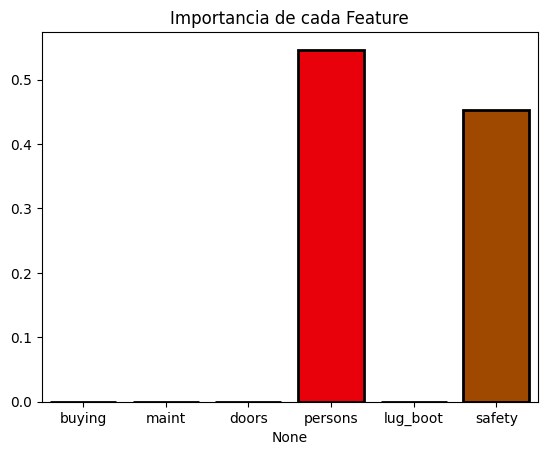

In [26]:
# Verificación del Feature Engineering (Ingeniería de características)
import seaborn as sns

importances = tree.feature_importances_
columns = X.columns
sns.barplot(x=columns,y=importances, palette = 'bright', saturation = 2.0, edgecolor = 'black', linewidth = 2)
plt.title('Importancia de cada Feature')
plt.show()

### ***Training - random forest***

In [27]:
# Importación de random forest
from sklearn.ensemble import RandomForestClassifier

# Ajustar hiperparámetros (nro. de estimadores)
# estimadores= nro. de árboles
rf = RandomForestClassifier(n_estimators = 10, random_state =0)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [28]:
# Cálculo de las predicciones en Train(ing) y Test
y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

### ***Test & validation - random forest***

In [29]:
# Cálculo de métricas
from sklearn.metrics import accuracy_score

# Cálculo el accuracy en Train(ing)
train_accuracy_rf =accuracy_score(y_train, y_train_pred_rf)

# Cálculo el accuracy en Test
test_accuracy_rf =accuracy_score(y_test, y_test_pred_rf)

print('El accuracy en train(ing) es:', train_accuracy_rf)
print('El accuracy en test es:', test_accuracy_rf)

# Importante: Podríamos reducir el número de estimadores (o árboles) para disminuir el sobreajuste (overfiting) del modelo.

El accuracy en train(ing) es: 0.9942100909842845
El accuracy en test es: 0.8863198458574181


In [30]:
# Visualización de las feature importantes
features_scores = pd.Series(rf.feature_importances_, index = X_train.columns).sort_values(ascending=False)
features_scores

safety      0.254441
buying      0.226386
persons     0.212589
maint       0.140068
lug_boot    0.090112
doors       0.076404
dtype: float64

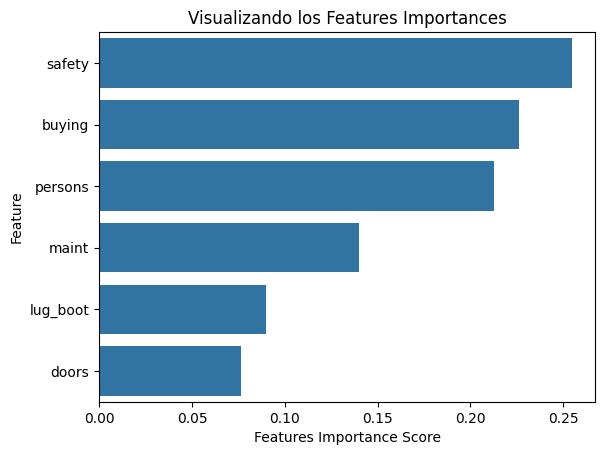

In [33]:
# Gráfico de barras
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(x=features_scores , y = features_scores.index)
plt.xlabel('Features Importance Score')
plt.ylabel('Feature')
plt.title("Visualizando los Features Importances")
plt.show()

In [34]:
# Matriz de confusión del RF
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_test_pred_rf)

print('Matriz de Confusión\n\n', cm)

Matriz de Confusión

 [[ 94   4  19   1]
 [ 11   7   0   1]
 [ 10   0 348   0]
 [ 12   1   0  11]]


In [35]:
 # RF
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred_rf))

              precision    recall  f1-score   support

         acc       0.74      0.80      0.77       118
        good       0.58      0.37      0.45        19
       unacc       0.95      0.97      0.96       358
       vgood       0.85      0.46      0.59        24

    accuracy                           0.89       519
   macro avg       0.78      0.65      0.69       519
weighted avg       0.88      0.89      0.88       519

